# Table of Contents
- [Imports](#Imports)
- [Set Up](#Set-Up)
- [Data Loaders](#Data-Loaders)
- [Model Training](#Model-Training)
- [Evaluation](#Evaluation)
- [Evaluation Insights](#Evaluation-Insights)
- [Interpretation using LIME](#Interpretation-using-LIME)
- [LIME visualizations for three random samples](#LIME-visualizations-for-three-random-samples)
- [Best/Worst Performing Samples](#Best/Worst-Performing-Samples)
- [Best/Worst Performing Insights](#Best-Performing-Samples)
- [Performance Per Gender](#Performance-Per-Gender)
- [Performance Per Age Group](#Performance-Per-Age-Group)
- [Performance Per Gender/Age Group Insights](#Model-Performance-by-Gender)

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay

from trainer import train_model
from evaluator import evaluate_model, load_model_from_checkpoint
from evaluator import evaluate_samples, get_best_and_worst_samples, load_model_from_checkpoint
from interpret import interpret_sample, ModelWrapper
from base_model import MultiTaskResNet
from utils_data_loader import get_custom_data_loaders_v2
from evaluation import generate_classification_report, perform_threshold_analysis, plot_confusion_matrix

# Set Up

In [2]:
CHECKPOINT_DIR = "checkpoints"
RESULTS_FILE = "metrics.csv"
EVALUATION_FILE = "evaluation_metrics.csv"

BATCH_SIZE = 32
MAX_EPOCHS = 10
LEARNING_RATE = 0.0001
VERSION = 'v2'

# Data Loaders

In [3]:
train_loader, val_loader, test_loader = get_custom_data_loaders_v2(batch_size=BATCH_SIZE)

[DEBUG] Loaded 14164 images from data/train
[DEBUG] Loaded 4722 images from data/validation
[DEBUG] Loaded 4722 images from data/test


# Model Training

In [4]:
print(f"--- Training Model Version: {VERSION} ---")
model = MultiTaskResNet(learning_rate=LEARNING_RATE)
train_model(model, train_loader, val_loader, test_loader, VERSION, max_epochs=MAX_EPOCHS, checkpoint_dir=CHECKPOINT_DIR)

--- Training Model Version: v2 ---


c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Liberty\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:652: Checkpoint directory C:\Users\Liberty\Desktop\CodingProjects\deep learning - sprint 3\modeling\checkpoints exists and is not empty.

  | Name  | Type         

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Val Gender Accuracy: 0.0000
Val Age MAE: 22.9684
Val Gender Accuracy: 0.0000
Val Age MAE: 13.1177


c:\Users\Liberty\anaconda3\Lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Train Gender Accuracy: 0.6250
Train Age MAE: 30.1251
Train Gender Accuracy: 0.4688
Train Age MAE: 39.7540
Train Gender Accuracy: 0.4375
Train Age MAE: 36.5772
Train Gender Accuracy: 0.5000
Train Age MAE: 31.5572
Train Gender Accuracy: 0.5000
Train Age MAE: 33.9736
Train Gender Accuracy: 0.5625
Train Age MAE: 35.8126
Train Gender Accuracy: 0.6250
Train Age MAE: 36.0050
Train Gender Accuracy: 0.6875
Train Age MAE: 37.7960
Train Gender Accuracy: 0.6562
Train Age MAE: 35.9990
Train Gender Accuracy: 0.7188
Train Age MAE: 34.7642
Train Gender Accuracy: 0.7188
Train Age MAE: 29.2093
Train Gender Accuracy: 0.6250
Train Age MAE: 36.7336
Train Gender Accuracy: 0.7188
Train Age MAE: 31.4705
Train Gender Accuracy: 0.7188
Train Age MAE: 29.4879
Train Gender Accuracy: 0.5625
Train Age MAE: 31.1273
Train Gender Accuracy: 0.7188
Train Age MAE: 33.9690
Train Gender Accuracy: 0.5938
Train Age MAE: 29.0862
Train Gender Accuracy: 0.6562
Train Age MAE: 30.3914
Train Gender Accuracy: 0.6250
Train Age MAE: 3

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7188
Val Age MAE: 5.9674
Val Gender Accuracy: 0.8750
Val Age MAE: 5.6361
Val Gender Accuracy: 0.7188
Val Age MAE: 5.0800
Val Gender Accuracy: 0.8750
Val Age MAE: 4.8852
Val Gender Accuracy: 0.7500
Val Age MAE: 4.6617
Val Gender Accuracy: 0.2500
Val Age MAE: 2.7396
Val Gender Accuracy: 0.1875
Val Age MAE: 2.1079
Val Gender Accuracy: 0.3750
Val Age MAE: 1.7049
Val Gender Accuracy: 0.4375
Val Age MAE: 3.8942
Val Gender Accuracy: 0.7188
Val Age MAE: 4.0136
Val Gender Accuracy: 0.7188
Val Age MAE: 4.1039
Val Gender Accuracy: 0.7812
Val Age MAE: 4.5125
Val Gender Accuracy: 0.7812
Val Age MAE: 3.6941
Val Gender Accuracy: 0.8125
Val Age MAE: 3.6003
Val Gender Accuracy: 0.6250
Val Age MAE: 4.4022
Val Gender Accuracy: 0.7500
Val Age MAE: 3.7834
Val Gender Accuracy: 0.7500
Val Age MAE: 3.4178
Val Gender Accuracy: 0.7812
Val Age MAE: 3.7228
Val Gender Accuracy: 0.7500
Val Age MAE: 5.2733
Val Gender Accuracy: 0.7500
Val Age MAE: 4.9275
Val Gender Accuracy: 0.5938
Val Age MAE:

Metric val_loss improved. New best score: 70.060
Epoch 0, global step 443: 'val_loss' reached 70.06013 (best 70.06013), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.5312
Val Age MAE: 5.9526
Val Gender Accuracy: 0.5556
Val Age MAE: 7.8356
Train Gender Accuracy: 0.5625
Train Age MAE: 5.2432
Train Gender Accuracy: 0.6250
Train Age MAE: 4.9691
Train Gender Accuracy: 0.6875
Train Age MAE: 5.0220
Train Gender Accuracy: 0.6250
Train Age MAE: 7.5340
Train Gender Accuracy: 0.7500
Train Age MAE: 5.9319
Train Gender Accuracy: 0.6250
Train Age MAE: 6.9557
Train Gender Accuracy: 0.6875
Train Age MAE: 7.2594
Train Gender Accuracy: 0.6875
Train Age MAE: 8.1372
Train Gender Accuracy: 0.7188
Train Age MAE: 4.7120
Train Gender Accuracy: 0.6250
Train Age MAE: 4.9844
Train Gender Accuracy: 0.7812
Train Age MAE: 6.4729
Train Gender Accuracy: 0.7500
Train Age MAE: 4.7109
Train Gender Accuracy: 0.5625
Train Age MAE: 5.7479
Train Gender Accuracy: 0.7812
Train Age MAE: 7.5187
Train Gender Accuracy: 0.8750
Train Age MAE: 5.1233
Train Gender Accuracy: 0.8125
Train Age MAE: 4.4732
Train Gender Accuracy: 0.7188
Train Age MAE: 6.4203
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 5.9350
Val Gender Accuracy: 0.9375
Val Age MAE: 5.4133
Val Gender Accuracy: 0.8438
Val Age MAE: 6.8131
Val Gender Accuracy: 0.8438
Val Age MAE: 5.7643
Val Gender Accuracy: 0.8750
Val Age MAE: 5.9761
Val Gender Accuracy: 0.4062
Val Age MAE: 2.9017
Val Gender Accuracy: 0.3125
Val Age MAE: 2.1983
Val Gender Accuracy: 0.5938
Val Age MAE: 1.9267
Val Gender Accuracy: 0.5000
Val Age MAE: 5.6313
Val Gender Accuracy: 0.8750
Val Age MAE: 4.5489
Val Gender Accuracy: 0.9062
Val Age MAE: 4.9599
Val Gender Accuracy: 0.8438
Val Age MAE: 4.2731
Val Gender Accuracy: 0.7812
Val Age MAE: 3.9133
Val Gender Accuracy: 0.8750
Val Age MAE: 3.5768
Val Gender Accuracy: 0.7812
Val Age MAE: 4.5499
Val Gender Accuracy: 0.8750
Val Age MAE: 3.6210
Val Gender Accuracy: 0.9375
Val Age MAE: 3.0156
Val Gender Accuracy: 0.7500
Val Age MAE: 3.6197
Val Gender Accuracy: 0.6875
Val Age MAE: 4.7115
Val Gender Accuracy: 0.8125
Val Age MAE: 3.4463
Val Gender Accuracy: 0.7188
Val Age MAE:

Metric val_loss improved by 14.874 >= min_delta = 0.0. New best score: 55.186
Epoch 1, global step 886: 'val_loss' reached 55.18593 (best 55.18593), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.1250
Val Age MAE: 5.2101
Val Gender Accuracy: 0.3333
Val Age MAE: 7.7124
Train Gender Accuracy: 0.7812
Train Age MAE: 6.0204
Train Gender Accuracy: 0.7812
Train Age MAE: 3.8499
Train Gender Accuracy: 0.7500
Train Age MAE: 4.4166
Train Gender Accuracy: 0.8438
Train Age MAE: 5.0236
Train Gender Accuracy: 0.8125
Train Age MAE: 4.6235
Train Gender Accuracy: 0.7188
Train Age MAE: 3.6571
Train Gender Accuracy: 0.7188
Train Age MAE: 3.6937
Train Gender Accuracy: 0.8125
Train Age MAE: 3.6506
Train Gender Accuracy: 0.6875
Train Age MAE: 4.0675
Train Gender Accuracy: 0.8125
Train Age MAE: 3.8635
Train Gender Accuracy: 0.6562
Train Age MAE: 3.4583
Train Gender Accuracy: 0.7188
Train Age MAE: 3.7843
Train Gender Accuracy: 0.6875
Train Age MAE: 5.8946
Train Gender Accuracy: 0.7812
Train Age MAE: 4.2704
Train Gender Accuracy: 0.7812
Train Age MAE: 7.3770
Train Gender Accuracy: 0.7500
Train Age MAE: 3.6411
Train Gender Accuracy: 0.7188
Train Age MAE: 5.5004
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9375
Val Age MAE: 4.6994
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1472
Val Gender Accuracy: 0.8438
Val Age MAE: 6.2205
Val Gender Accuracy: 0.8750
Val Age MAE: 4.9956
Val Gender Accuracy: 0.9062
Val Age MAE: 5.2159
Val Gender Accuracy: 0.3125
Val Age MAE: 2.3875
Val Gender Accuracy: 0.2812
Val Age MAE: 1.9432
Val Gender Accuracy: 0.4375
Val Age MAE: 1.7121
Val Gender Accuracy: 0.5938
Val Age MAE: 4.4531
Val Gender Accuracy: 0.9375
Val Age MAE: 4.1576
Val Gender Accuracy: 0.9062
Val Age MAE: 3.8661
Val Gender Accuracy: 0.9375
Val Age MAE: 4.0279
Val Gender Accuracy: 1.0000
Val Age MAE: 3.1846
Val Gender Accuracy: 0.9375
Val Age MAE: 2.7022
Val Gender Accuracy: 0.9688
Val Age MAE: 3.5979
Val Gender Accuracy: 0.9375
Val Age MAE: 3.0665
Val Gender Accuracy: 0.9375
Val Age MAE: 2.2818
Val Gender Accuracy: 0.9062
Val Age MAE: 2.6482
Val Gender Accuracy: 0.7812
Val Age MAE: 3.5910
Val Gender Accuracy: 0.9062
Val Age MAE: 2.5624
Val Gender Accuracy: 0.9062
Val Age MAE:

Epoch 2, global step 1329: 'val_loss' was not in top 1


Val Gender Accuracy: 0.3125
Val Age MAE: 4.9447
Val Gender Accuracy: 0.3333
Val Age MAE: 7.2865
Train Gender Accuracy: 0.8438
Train Age MAE: 2.8340
Train Gender Accuracy: 0.8125
Train Age MAE: 3.2117
Train Gender Accuracy: 0.8438
Train Age MAE: 3.9395
Train Gender Accuracy: 0.8750
Train Age MAE: 3.1941
Train Gender Accuracy: 0.8125
Train Age MAE: 3.1508
Train Gender Accuracy: 0.8438
Train Age MAE: 3.6246
Train Gender Accuracy: 0.8750
Train Age MAE: 5.4826
Train Gender Accuracy: 0.7500
Train Age MAE: 3.2818
Train Gender Accuracy: 0.8125
Train Age MAE: 4.1702
Train Gender Accuracy: 0.8125
Train Age MAE: 3.7208
Train Gender Accuracy: 0.9375
Train Age MAE: 4.0304
Train Gender Accuracy: 0.8125
Train Age MAE: 6.9322
Train Gender Accuracy: 0.8438
Train Age MAE: 4.5389
Train Gender Accuracy: 0.8750
Train Age MAE: 3.9908
Train Gender Accuracy: 0.8125
Train Age MAE: 3.7175
Train Gender Accuracy: 0.7812
Train Age MAE: 4.2607
Train Gender Accuracy: 0.8750
Train Age MAE: 3.9654
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 4.9325
Val Gender Accuracy: 0.8750
Val Age MAE: 4.2241
Val Gender Accuracy: 0.8438
Val Age MAE: 4.7194
Val Gender Accuracy: 0.8125
Val Age MAE: 5.1079
Val Gender Accuracy: 0.9062
Val Age MAE: 5.6573
Val Gender Accuracy: 0.5000
Val Age MAE: 2.1946
Val Gender Accuracy: 0.3750
Val Age MAE: 1.2956
Val Gender Accuracy: 0.3750
Val Age MAE: 1.0768
Val Gender Accuracy: 0.6250
Val Age MAE: 5.2208
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6762
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7480
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6646
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6397
Val Gender Accuracy: 0.9062
Val Age MAE: 3.5113
Val Gender Accuracy: 1.0000
Val Age MAE: 3.8949
Val Gender Accuracy: 0.8750
Val Age MAE: 3.3780
Val Gender Accuracy: 0.9688
Val Age MAE: 2.9325
Val Gender Accuracy: 0.9062
Val Age MAE: 3.5144
Val Gender Accuracy: 0.7500
Val Age MAE: 4.2174
Val Gender Accuracy: 0.8438
Val Age MAE: 3.2646
Val Gender Accuracy: 0.9062
Val Age MAE:

Metric val_loss improved by 0.819 >= min_delta = 0.0. New best score: 54.367
Epoch 3, global step 1772: 'val_loss' reached 54.36656 (best 54.36656), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.5938
Val Age MAE: 6.9760
Val Gender Accuracy: 0.5556
Val Age MAE: 7.7574
Train Gender Accuracy: 0.8750
Train Age MAE: 2.2339
Train Gender Accuracy: 0.9062
Train Age MAE: 3.1429
Train Gender Accuracy: 0.9688
Train Age MAE: 3.7742
Train Gender Accuracy: 0.8750
Train Age MAE: 3.4771
Train Gender Accuracy: 0.8438
Train Age MAE: 1.9025
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7975
Train Gender Accuracy: 0.8438
Train Age MAE: 6.0020
Train Gender Accuracy: 0.7500
Train Age MAE: 2.1919
Train Gender Accuracy: 0.9062
Train Age MAE: 4.8384
Train Gender Accuracy: 0.8750
Train Age MAE: 5.5469
Train Gender Accuracy: 0.9375
Train Age MAE: 2.9378
Train Gender Accuracy: 0.8438
Train Age MAE: 2.7010
Train Gender Accuracy: 0.7812
Train Age MAE: 4.5114
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4103
Train Gender Accuracy: 0.9688
Train Age MAE: 3.7380
Train Gender Accuracy: 0.7812
Train Age MAE: 3.5193
Train Gender Accuracy: 0.7812
Train Age MAE: 3.0032
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8750
Val Age MAE: 4.6178
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6094
Val Gender Accuracy: 0.9062
Val Age MAE: 4.6639
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7488
Val Gender Accuracy: 0.9375
Val Age MAE: 6.1645
Val Gender Accuracy: 0.4688
Val Age MAE: 1.8736
Val Gender Accuracy: 0.3750
Val Age MAE: 1.3753
Val Gender Accuracy: 0.3438
Val Age MAE: 1.1935
Val Gender Accuracy: 0.6562
Val Age MAE: 5.1772
Val Gender Accuracy: 1.0000
Val Age MAE: 3.7747
Val Gender Accuracy: 0.9375
Val Age MAE: 4.1013
Val Gender Accuracy: 0.9375
Val Age MAE: 4.3598
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5791
Val Gender Accuracy: 1.0000
Val Age MAE: 3.4154
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5019
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6205
Val Gender Accuracy: 1.0000
Val Age MAE: 2.8255
Val Gender Accuracy: 1.0000
Val Age MAE: 2.5487
Val Gender Accuracy: 0.8125
Val Age MAE: 3.5805
Val Gender Accuracy: 0.8438
Val Age MAE: 3.2057
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 0.989 >= min_delta = 0.0. New best score: 53.378
Epoch 4, global step 2215: 'val_loss' reached 53.37802 (best 53.37802), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.4688
Val Age MAE: 5.5170
Val Gender Accuracy: 0.6111
Val Age MAE: 6.1039
Train Gender Accuracy: 0.7812
Train Age MAE: 2.3754
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5837
Train Gender Accuracy: 0.9062
Train Age MAE: 2.8939
Train Gender Accuracy: 0.8438
Train Age MAE: 2.9755
Train Gender Accuracy: 0.9062
Train Age MAE: 3.2144
Train Gender Accuracy: 0.9062
Train Age MAE: 3.6022
Train Gender Accuracy: 0.9062
Train Age MAE: 5.3837
Train Gender Accuracy: 0.9062
Train Age MAE: 2.5135
Train Gender Accuracy: 0.9062
Train Age MAE: 2.3729
Train Gender Accuracy: 0.9062
Train Age MAE: 2.8985
Train Gender Accuracy: 0.8125
Train Age MAE: 2.6244
Train Gender Accuracy: 0.8438
Train Age MAE: 3.1491
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0403
Train Gender Accuracy: 0.9688
Train Age MAE: 3.5924
Train Gender Accuracy: 0.8438
Train Age MAE: 2.6678
Train Gender Accuracy: 0.8125
Train Age MAE: 2.3587
Train Gender Accuracy: 0.9062
Train Age MAE: 2.4569
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9375
Val Age MAE: 4.8205
Val Gender Accuracy: 0.9688
Val Age MAE: 3.8790
Val Gender Accuracy: 0.9375
Val Age MAE: 4.3130
Val Gender Accuracy: 0.8750
Val Age MAE: 3.8117
Val Gender Accuracy: 1.0000
Val Age MAE: 4.0991
Val Gender Accuracy: 0.5625
Val Age MAE: 1.4489
Val Gender Accuracy: 0.4688
Val Age MAE: 0.7514
Val Gender Accuracy: 0.5938
Val Age MAE: 0.8621
Val Gender Accuracy: 0.7188
Val Age MAE: 3.9385
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5745
Val Gender Accuracy: 0.9062
Val Age MAE: 4.2300
Val Gender Accuracy: 0.9062
Val Age MAE: 3.5379
Val Gender Accuracy: 1.0000
Val Age MAE: 3.3607
Val Gender Accuracy: 1.0000
Val Age MAE: 3.2779
Val Gender Accuracy: 0.9688
Val Age MAE: 2.8714
Val Gender Accuracy: 0.9688
Val Age MAE: 2.5295
Val Gender Accuracy: 1.0000
Val Age MAE: 2.2190
Val Gender Accuracy: 1.0000
Val Age MAE: 2.3845
Val Gender Accuracy: 0.8125
Val Age MAE: 3.6624
Val Gender Accuracy: 0.8438
Val Age MAE: 3.5414
Val Gender Accuracy: 0.9688
Val Age MAE:

Epoch 5, global step 2658: 'val_loss' was not in top 1


Val Gender Accuracy: 0.4688
Val Age MAE: 5.4585
Val Gender Accuracy: 0.7222
Val Age MAE: 5.7951
Train Gender Accuracy: 0.8438
Train Age MAE: 2.6635
Train Gender Accuracy: 0.9375
Train Age MAE: 1.7435
Train Gender Accuracy: 0.8438
Train Age MAE: 2.5692
Train Gender Accuracy: 0.9688
Train Age MAE: 2.3881
Train Gender Accuracy: 0.9375
Train Age MAE: 2.2824
Train Gender Accuracy: 0.9062
Train Age MAE: 3.7293
Train Gender Accuracy: 0.9375
Train Age MAE: 3.0241
Train Gender Accuracy: 0.9062
Train Age MAE: 2.8885
Train Gender Accuracy: 0.8750
Train Age MAE: 2.1421
Train Gender Accuracy: 0.7812
Train Age MAE: 3.4085
Train Gender Accuracy: 0.9062
Train Age MAE: 2.4712
Train Gender Accuracy: 0.8438
Train Age MAE: 3.2562
Train Gender Accuracy: 0.9375
Train Age MAE: 2.4165
Train Gender Accuracy: 0.8750
Train Age MAE: 2.6907
Train Gender Accuracy: 0.8438
Train Age MAE: 2.4094
Train Gender Accuracy: 0.9062
Train Age MAE: 2.9748
Train Gender Accuracy: 0.8750
Train Age MAE: 2.4863
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.7812
Val Age MAE: 4.2909
Val Gender Accuracy: 0.8750
Val Age MAE: 3.7665
Val Gender Accuracy: 0.8750
Val Age MAE: 4.4274
Val Gender Accuracy: 0.9062
Val Age MAE: 4.4419
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7680
Val Gender Accuracy: 0.4062
Val Age MAE: 1.5460
Val Gender Accuracy: 0.3125
Val Age MAE: 0.9265
Val Gender Accuracy: 0.3750
Val Age MAE: 0.8485
Val Gender Accuracy: 0.7188
Val Age MAE: 3.8690
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7837
Val Gender Accuracy: 0.9062
Val Age MAE: 3.4911
Val Gender Accuracy: 0.9375
Val Age MAE: 3.7088
Val Gender Accuracy: 0.9688
Val Age MAE: 2.8237
Val Gender Accuracy: 0.9375
Val Age MAE: 3.2792
Val Gender Accuracy: 1.0000
Val Age MAE: 3.0293
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4524
Val Gender Accuracy: 1.0000
Val Age MAE: 2.7079
Val Gender Accuracy: 1.0000
Val Age MAE: 2.4185
Val Gender Accuracy: 0.8750
Val Age MAE: 3.5781
Val Gender Accuracy: 0.8438
Val Age MAE: 3.0274
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 0.535 >= min_delta = 0.0. New best score: 52.843
Epoch 6, global step 3101: 'val_loss' reached 52.84326 (best 52.84326), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.7188
Val Age MAE: 5.7661
Val Gender Accuracy: 0.8333
Val Age MAE: 7.1628
Train Gender Accuracy: 0.8750
Train Age MAE: 2.0367
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9348
Train Gender Accuracy: 0.8438
Train Age MAE: 2.0761
Train Gender Accuracy: 0.9375
Train Age MAE: 1.9545
Train Gender Accuracy: 0.9688
Train Age MAE: 1.8930
Train Gender Accuracy: 0.9688
Train Age MAE: 2.9609
Train Gender Accuracy: 0.9062
Train Age MAE: 2.7073
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1336
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7368
Train Gender Accuracy: 0.9375
Train Age MAE: 3.7296
Train Gender Accuracy: 0.9375
Train Age MAE: 2.9113
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1811
Train Gender Accuracy: 0.8750
Train Age MAE: 1.5213
Train Gender Accuracy: 0.9062
Train Age MAE: 2.2384
Train Gender Accuracy: 0.8750
Train Age MAE: 2.0362
Train Gender Accuracy: 0.8438
Train Age MAE: 2.0087
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1693
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9375
Val Age MAE: 5.7303
Val Gender Accuracy: 0.9688
Val Age MAE: 4.7573
Val Gender Accuracy: 0.9062
Val Age MAE: 6.7778
Val Gender Accuracy: 0.9375
Val Age MAE: 6.4242
Val Gender Accuracy: 0.9688
Val Age MAE: 5.7901
Val Gender Accuracy: 0.6250
Val Age MAE: 1.8514
Val Gender Accuracy: 0.5938
Val Age MAE: 1.2257
Val Gender Accuracy: 0.5000
Val Age MAE: 1.1159
Val Gender Accuracy: 0.7500
Val Age MAE: 5.3523
Val Gender Accuracy: 0.9375
Val Age MAE: 5.1064
Val Gender Accuracy: 0.9062
Val Age MAE: 5.6749
Val Gender Accuracy: 0.9375
Val Age MAE: 5.0615
Val Gender Accuracy: 1.0000
Val Age MAE: 4.2752
Val Gender Accuracy: 1.0000
Val Age MAE: 4.4011
Val Gender Accuracy: 1.0000
Val Age MAE: 3.8547
Val Gender Accuracy: 0.9688
Val Age MAE: 4.0748
Val Gender Accuracy: 1.0000
Val Age MAE: 3.4148
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6144
Val Gender Accuracy: 0.9062
Val Age MAE: 4.1377
Val Gender Accuracy: 0.8438
Val Age MAE: 3.2406
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 0.521 >= min_delta = 0.0. New best score: 52.322
Epoch 7, global step 3544: 'val_loss' reached 52.32237 (best 52.32237), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.7188
Val Age MAE: 6.8315
Val Gender Accuracy: 0.7778
Val Age MAE: 8.4827
Train Gender Accuracy: 0.9062
Train Age MAE: 2.9297
Train Gender Accuracy: 0.8438
Train Age MAE: 1.5591
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0988
Train Gender Accuracy: 0.7500
Train Age MAE: 2.6869
Train Gender Accuracy: 0.9062
Train Age MAE: 3.0820
Train Gender Accuracy: 0.9062
Train Age MAE: 2.8878
Train Gender Accuracy: 0.9062
Train Age MAE: 2.3896
Train Gender Accuracy: 0.9688
Train Age MAE: 1.8107
Train Gender Accuracy: 0.9062
Train Age MAE: 1.8109
Train Gender Accuracy: 0.9688
Train Age MAE: 1.9918
Train Gender Accuracy: 0.9688
Train Age MAE: 2.1106
Train Gender Accuracy: 1.0000
Train Age MAE: 3.0298
Train Gender Accuracy: 0.9688
Train Age MAE: 2.6277
Train Gender Accuracy: 0.8438
Train Age MAE: 2.0815
Train Gender Accuracy: 0.9375
Train Age MAE: 2.5064
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9320
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9156
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.8438
Val Age MAE: 4.4217
Val Gender Accuracy: 0.9062
Val Age MAE: 3.8348
Val Gender Accuracy: 0.8750
Val Age MAE: 4.6699
Val Gender Accuracy: 0.9062
Val Age MAE: 4.2281
Val Gender Accuracy: 0.9688
Val Age MAE: 4.3625
Val Gender Accuracy: 0.6250
Val Age MAE: 1.5009
Val Gender Accuracy: 0.5938
Val Age MAE: 0.8497
Val Gender Accuracy: 0.6250
Val Age MAE: 0.8556
Val Gender Accuracy: 0.8125
Val Age MAE: 3.6933
Val Gender Accuracy: 1.0000
Val Age MAE: 2.9129
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1565
Val Gender Accuracy: 0.9062
Val Age MAE: 3.9067
Val Gender Accuracy: 0.9688
Val Age MAE: 2.5621
Val Gender Accuracy: 0.9375
Val Age MAE: 2.8146
Val Gender Accuracy: 1.0000
Val Age MAE: 3.0955
Val Gender Accuracy: 0.9375
Val Age MAE: 2.8309
Val Gender Accuracy: 1.0000
Val Age MAE: 2.4111
Val Gender Accuracy: 0.9688
Val Age MAE: 2.4873
Val Gender Accuracy: 0.9062
Val Age MAE: 3.4410
Val Gender Accuracy: 0.8125
Val Age MAE: 3.7205
Val Gender Accuracy: 0.9375
Val Age MAE:

Metric val_loss improved by 0.692 >= min_delta = 0.0. New best score: 51.630
Epoch 8, global step 3987: 'val_loss' reached 51.63020 (best 51.63020), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.7812
Val Age MAE: 4.1439
Val Gender Accuracy: 0.7778
Val Age MAE: 6.9654
Train Gender Accuracy: 0.7812
Train Age MAE: 2.6868
Train Gender Accuracy: 0.9062
Train Age MAE: 1.9348
Train Gender Accuracy: 0.9375
Train Age MAE: 1.7406
Train Gender Accuracy: 0.9062
Train Age MAE: 1.8462
Train Gender Accuracy: 0.9375
Train Age MAE: 1.6591
Train Gender Accuracy: 0.8750
Train Age MAE: 1.9057
Train Gender Accuracy: 0.9062
Train Age MAE: 2.0841
Train Gender Accuracy: 0.8125
Train Age MAE: 2.3914
Train Gender Accuracy: 0.8438
Train Age MAE: 2.1122
Train Gender Accuracy: 0.8750
Train Age MAE: 2.6232
Train Gender Accuracy: 0.8438
Train Age MAE: 2.2859
Train Gender Accuracy: 0.8438
Train Age MAE: 2.3284
Train Gender Accuracy: 0.8438
Train Age MAE: 3.4441
Train Gender Accuracy: 0.9062
Train Age MAE: 2.1649
Train Gender Accuracy: 0.8750
Train Age MAE: 2.7855
Train Gender Accuracy: 1.0000
Train Age MAE: 2.8742
Train Gender Accuracy: 0.9688
Train Age MAE: 2.0805
Train Gender Accurac

Validation: |          | 0/? [00:00<?, ?it/s]

Val Gender Accuracy: 0.9062
Val Age MAE: 4.8987
Val Gender Accuracy: 0.9688
Val Age MAE: 3.7023
Val Gender Accuracy: 0.9375
Val Age MAE: 6.0377
Val Gender Accuracy: 0.9375
Val Age MAE: 4.7491
Val Gender Accuracy: 0.9688
Val Age MAE: 5.4114
Val Gender Accuracy: 0.7188
Val Age MAE: 1.8823
Val Gender Accuracy: 0.6562
Val Age MAE: 1.4356
Val Gender Accuracy: 0.6875
Val Age MAE: 1.1515
Val Gender Accuracy: 0.8125
Val Age MAE: 4.9893
Val Gender Accuracy: 1.0000
Val Age MAE: 4.2371
Val Gender Accuracy: 0.9062
Val Age MAE: 5.2262
Val Gender Accuracy: 0.9375
Val Age MAE: 4.4124
Val Gender Accuracy: 1.0000
Val Age MAE: 3.5325
Val Gender Accuracy: 0.9688
Val Age MAE: 3.6891
Val Gender Accuracy: 1.0000
Val Age MAE: 3.6959
Val Gender Accuracy: 0.9375
Val Age MAE: 3.5953
Val Gender Accuracy: 1.0000
Val Age MAE: 2.6039
Val Gender Accuracy: 1.0000
Val Age MAE: 3.2406
Val Gender Accuracy: 0.9062
Val Age MAE: 3.4366
Val Gender Accuracy: 0.9062
Val Age MAE: 3.1998
Val Gender Accuracy: 1.0000
Val Age MAE:

Metric val_loss improved by 0.673 >= min_delta = 0.0. New best score: 50.957
Epoch 9, global step 4430: 'val_loss' reached 50.95681 (best 50.95681), saving model to 'C:\\Users\\Liberty\\Desktop\\CodingProjects\\deep learning - sprint 3\\modeling\\checkpoints\\v2_best.ckpt' as top 1


Val Gender Accuracy: 0.6562
Val Age MAE: 6.1305
Val Gender Accuracy: 0.7778
Val Age MAE: 8.8674


`Trainer.fit` stopped: `max_epochs=10` reached.


Training complete for version v2. Checkpoint saved to checkpoints


# Evaluation

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
checkpoint_path = "checkpoints/v2_best.ckpt"
model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=5e-5)
model = model.to(device)

generate_classification_report(model, val_loader, dataset_name="Validation")
generate_classification_report(model, test_loader, dataset_name="Test")

Classification Report for Validation Set:
              precision    recall  f1-score   support

        Male       0.91      0.89      0.90      2465
      Female       0.88      0.90      0.89      2257

    accuracy                           0.89      4722
   macro avg       0.89      0.90      0.89      4722
weighted avg       0.90      0.89      0.89      4722

Classification Report for Test Set:
              precision    recall  f1-score   support

        Male       0.92      0.89      0.91      2467
      Female       0.89      0.91      0.90      2255

    accuracy                           0.90      4722
   macro avg       0.90      0.90      0.90      4722
weighted avg       0.90      0.90      0.90      4722



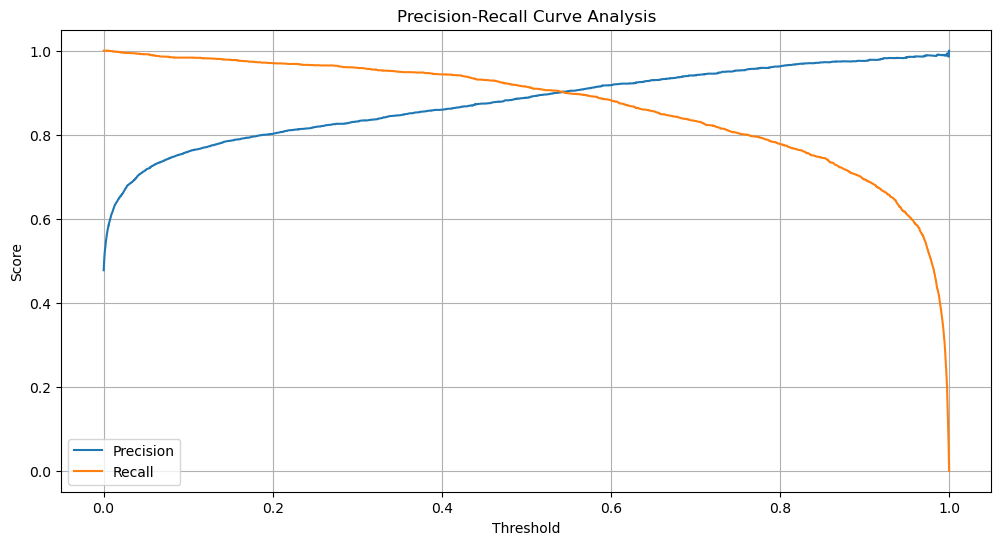

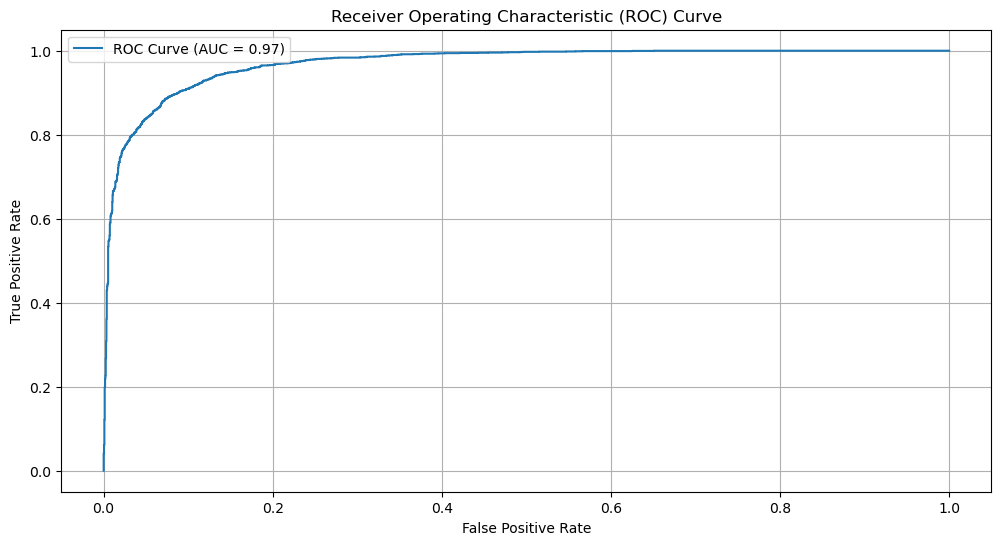

Best Threshold (based on F1 score): 0.46169692277908325


In [6]:
perform_threshold_analysis(model, test_loader)

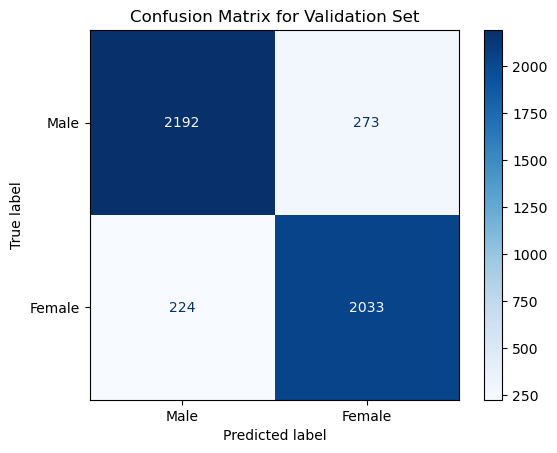

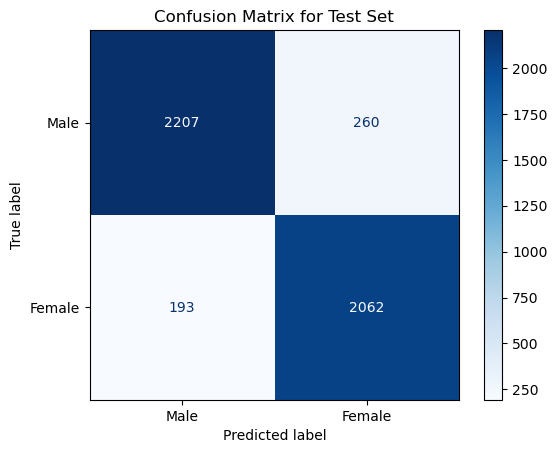

In [7]:
plot_confusion_matrix(model, val_loader, dataset_name="Validation")
plot_confusion_matrix(model, test_loader, dataset_name="Test")

--- Evaluating Model Version: v2 ---
Test Gender Accuracy: 0.9041
Test Age MAE: 5.0961


Version  Test_Gender_Accuracy  Test_Age_MAE
1      v2              0.904066      5.096104

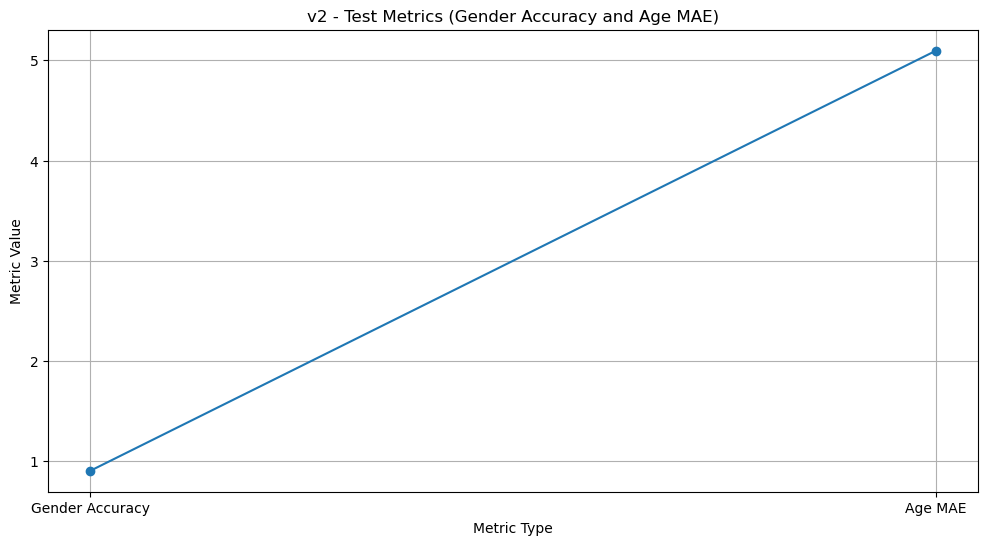

In [10]:
checkpoint_path = "checkpoints/v2_best.ckpt"
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
    metrics = evaluate_model(model, test_loader)

    if os.path.exists(EVALUATION_FILE):
        evaluation_df = pd.read_csv(EVALUATION_FILE, header=None)
        evaluation_df.columns = ['Version', 'Test_Gender_Accuracy', 'Test_Age_MAE']
        version_eval_metrics = evaluation_df[evaluation_df['Version'] == VERSION]
        display(version_eval_metrics)

        plt.figure(figsize=(12, 6))
        plt.plot(['Gender Accuracy', 'Age MAE'], [version_eval_metrics['Test_Gender_Accuracy'].values[0], version_eval_metrics['Test_Age_MAE'].values[0]], marker='o')
        plt.xlabel('Metric Type')
        plt.ylabel('Metric Value')
        plt.title(f'{VERSION} - Test Metrics (Gender Accuracy and Age MAE)')
        plt.grid(True)
        plt.show()

## Evaluation Insights

> Validation Set

  - Precision, Recall, and F1-score are generally consistent for both males and females (around 0.89-0.91).
  - The overall accuracy for the validation set is **0.89**, with slightly better performance on males compared to females.
  - Looking at the  confusion matrix, the model tends to have a slightly higher misclassification rate for females.

> Test Set

  - The precision for males is slightly higher (**0.92**) compared to females (**0.87**), indicating a slight preference for predicting males correctly.
  - Overall accuracy is **0.89**, suggesting similar performance as the validation set.
  - The confusion matrix, similar to the validation set, the misclassification rate for females is slightly higher.

**Performance Analysis by Gender and Age**
- **Gender**:
  - The accuracy for both genders is nearly equal, showing no significant bias in performance across genders.
  - Gender Accuracy: **0.9041** for the test set indicates the model performs quite well in gender classification.

- **Age**:
  - The model performs best for children aged **0-10**, with accuracy over **0.8**.
  - There is a sharp decline in accuracy for the age group **10-20**, and it continues to degrade for older age groups.
  - The model performs worst for age groups **70+**, with accuracy falling below **0.5**, indicating difficulty in predicting the correct age for older individuals.
  - Age MAE: **5.0961** indicates that the predicted age is off by about 5 years on average, which is better than version v1, showing improvements.

**Insights**
1. **Gender Analysis**:
  - The model maintains a good balance between predicting males and females, but there is still a slight preference for males.
  - The precision and recall scores suggest a slight tendency to misclassify females as males.

2. **Age Analysis**:
  - Younger individuals (ages **0-10**) are better classified, while the model struggles with older individuals, especially **70+**.
  - The declining accuracy as age increases could be due to fewer samples of older individuals in the dataset, leading to underrepresentation during training.

3. **Threshold Analysis**:
  - The threshold setting plays an important role in balancing precision and recall. The **optimal threshold** should be considered for use in deployment to ensure balanced performance.
  - It may be worth exploring different thresholds depending on the specific use-case requirements (e.g., maximizing precision or recall).

4. **ROC Analysis**:
  - The high AUC (**0.97**) shows that the model is generally good at separating positive and negative classes. However, focusing on adjusting the threshold to minimize false positives and false negatives would further improve the results.

# Interpretation using LIME

--- Interpreting Model Version: v2 ---
Interpreting model version v2 for gender prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

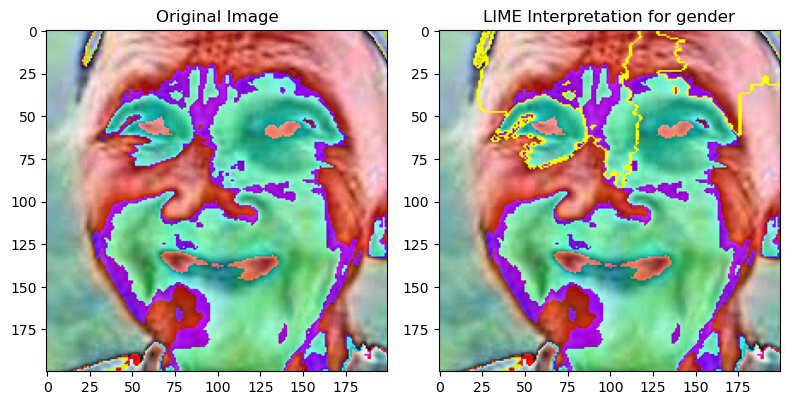

Interpreting model version v2 for age prediction (sample 1).


  0%|          | 0/1000 [00:00<?, ?it/s]

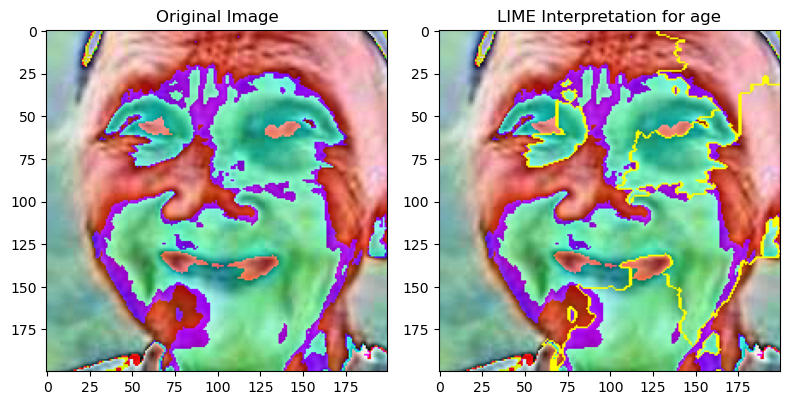

Interpreting model version v2 for gender prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

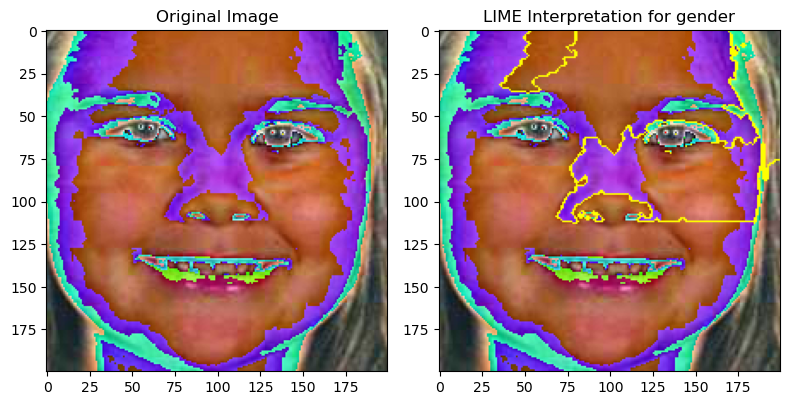

Interpreting model version v2 for age prediction (sample 2).


  0%|          | 0/1000 [00:00<?, ?it/s]

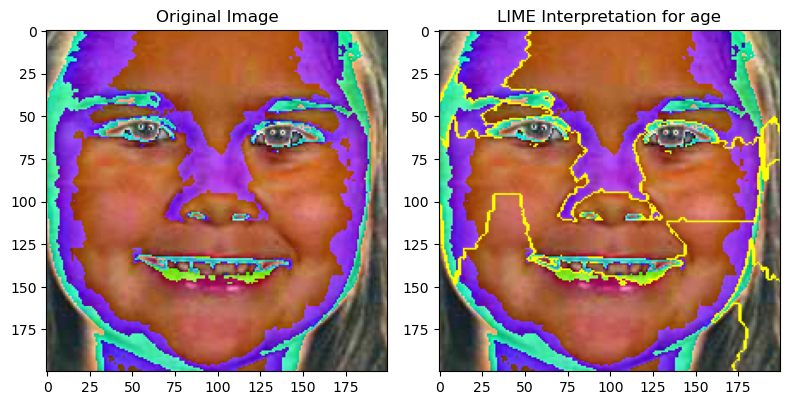

Interpreting model version v2 for gender prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

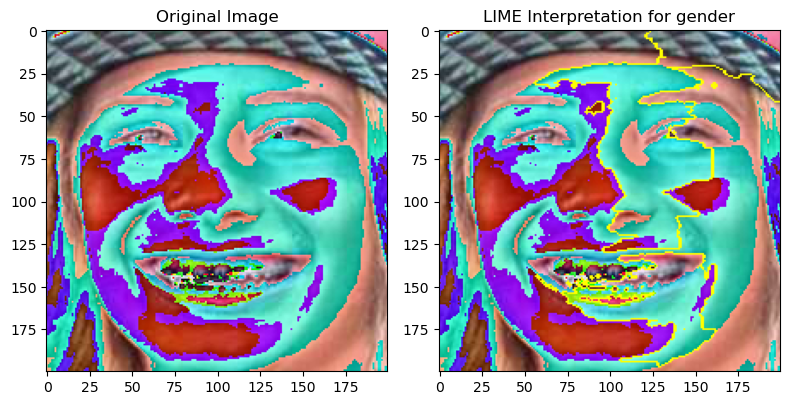

Interpreting model version v2 for age prediction (sample 3).


  0%|          | 0/1000 [00:00<?, ?it/s]

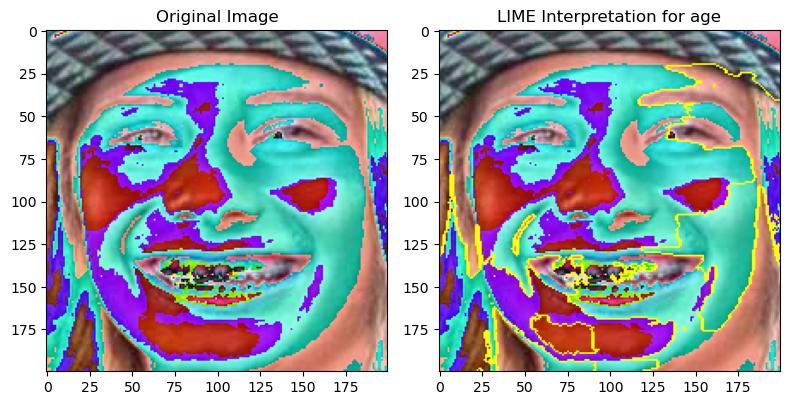

In [11]:
if os.path.exists(checkpoint_path):
    print(f"--- Interpreting Model Version: {VERSION} ---")
    model_wrapper = ModelWrapper(model)
    
    data_iter = iter(test_loader)
    for i in range(3):
        inputs, labels = next(data_iter)
        image_np = inputs[0].permute(1, 2, 0).numpy() * 255 
        label = labels

        print(f"Interpreting model version {VERSION} for gender prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='gender')

        print(f"Interpreting model version {VERSION} for age prediction (sample {i + 1}).")
        interpret_sample(model_wrapper, image_np.astype('uint8'), label, feature_name='age')

### LIME visualizations for three random samples

**Sample One (Older Female)**
    - Gender:
        - The highlighted regions are mostly around the facial contour and forehead.
    - Age:
        - There seems to be more focus on the central parts of the face, including the cheeks and chin.

**Sample Two (Young Female)**
    - Gender:
        - The model seems to focus on facial edges and eyes, but also on parts of the mouth.
    - Age:
        - The areas highlighted expand across the entire face, potentially indicating that the model is trying to assess specific aging characteristics.

**Sample Three (Teenage Female with Braces)**
    - Gender:
        - Shows some focus on the jawline, mouth, and forehead, with certain areas around the cheeks also being highlighted.
    - Age:
        - The model focuses more on the facial contour and the area around the mouth, indicating that these features might be deemed more indicative of age.



> Observations:

1. **Highlighted Regions and Importance:**
   - The regions highlighted by LIME vary based on whether the model is making gender or age predictions, suggesting that the model is focusing on different facial features depending on the task.
   - Across all three images, we can see that different facial areas, including eyes, mouth, and sometimes nose, are more consistently highlighted.

2. **Importance of Facial Features:**
   - The fact that LIME is highlighting different regions for age and gender suggests that the model is treating these as distinct learning tasks and relying on different parts of the face for classification. 
   - The consistency in the highlighted regions across different images could imply that the model has generalized well in finding features relevant to age and gender.

> Comparison with Version 1:

- The interpretations of v2 reveal that the highlighted regions are more consistent compared to v1. Version 1 had less distinct highlighting, suggesting that v2 has potentially improved feature extraction and better identification of regions critical for classification.
- Model v2 shows clearer differentiation between gender and age predictions, indicating improved learning specificity, which is also reflected in the evaluation metrics where the accuracy is generally higher than in v1.

> Potential Issues:

- **Age Prediction Challenges:**
  - For age prediction, the model highlights facial regions in a seemingly broader pattern, which may indicate a lack of clear focus compared to gender prediction. This could suggest that the model finds it harder to distinguish age precisely, especially in overlapping age ranges or due to biases in the dataset.
  - The attention on areas like the forehead, cheeks, and mouth suggests that age-related features may not always be easily discernible for different individuals, which can lead to variations in model performance.

- **Sensitivity to Image Quality and Facial Characteristics:**
  - Given the influence of image quality (e.g., sharpness and blurriness), the highlighted regions may also be impacted by how clearly the features are represented in the images. If the dataset has variability in image quality, it could affect what regions are highlighted, leading to inconsistent predictions.

# Best/Worst Performing Samples

--- Evaluating Model Version: v2 ---
Model loaded successfully.
Interpreting model version v2 for best performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

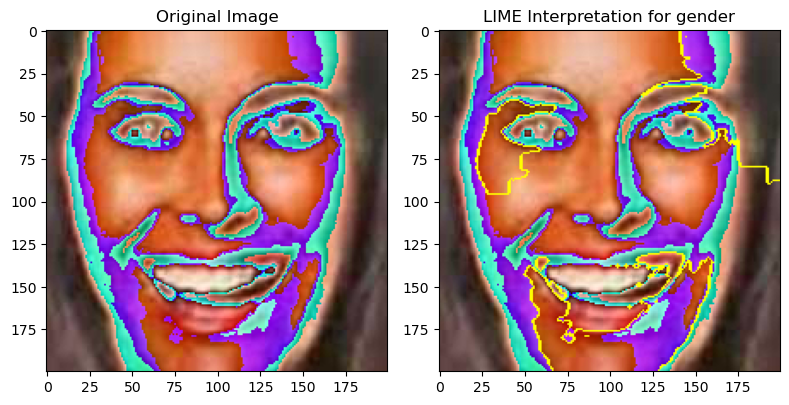

Interpreting model version v2 for best performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

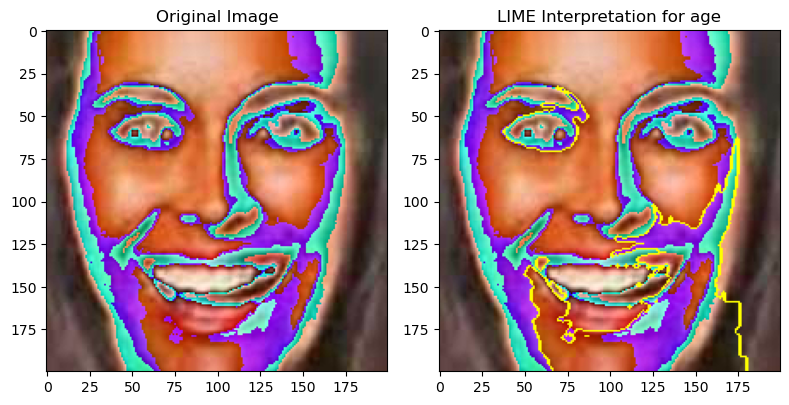

Interpreting model version v2 for best performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

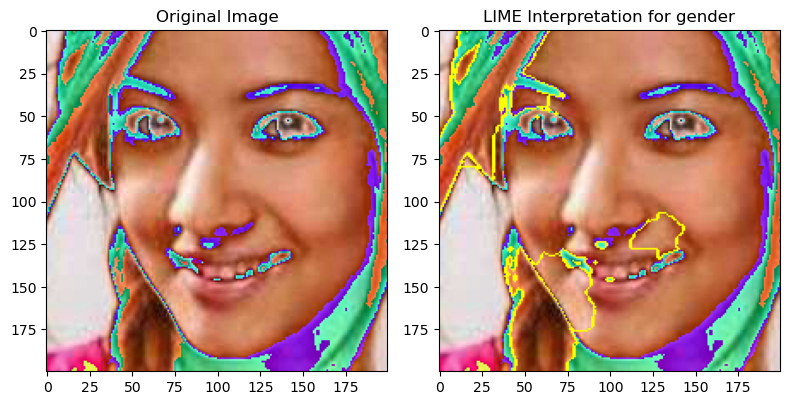

Interpreting model version v2 for best performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

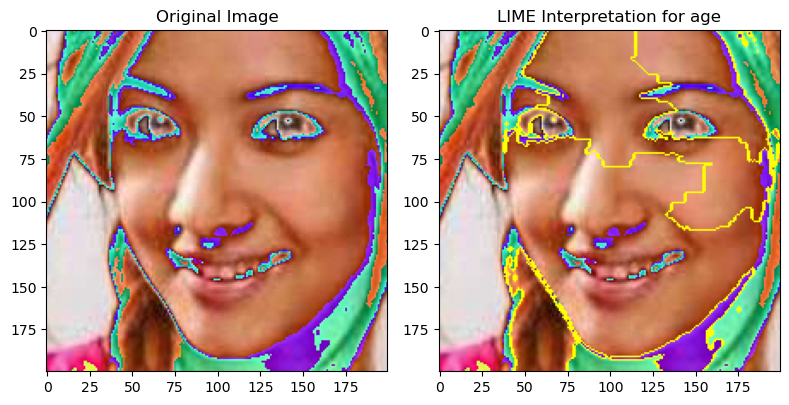

Interpreting model version v2 for best performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

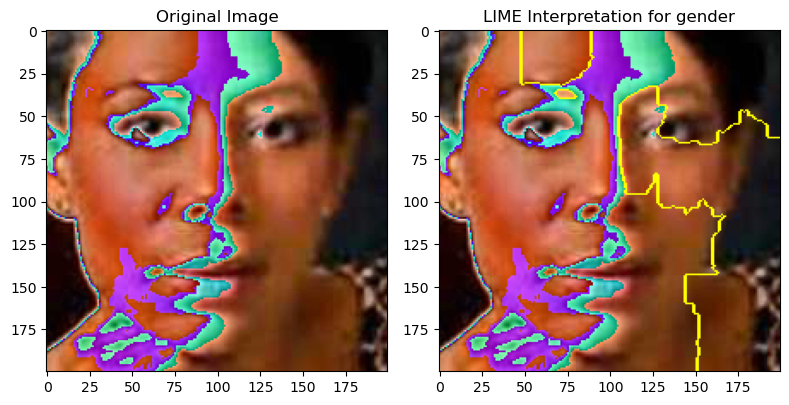

Interpreting model version v2 for best performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

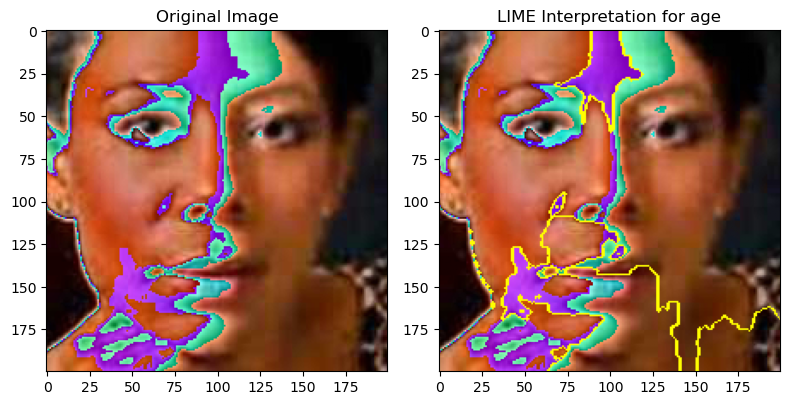

Interpreting model version v2 for worst performing sample 1 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

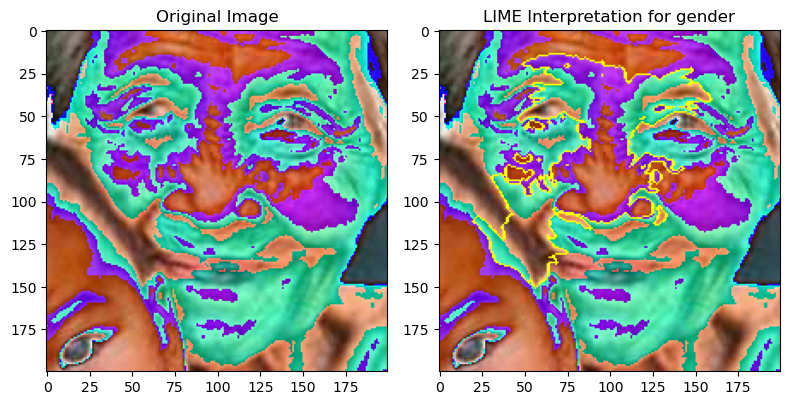

Interpreting model version v2 for worst performing sample 1 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

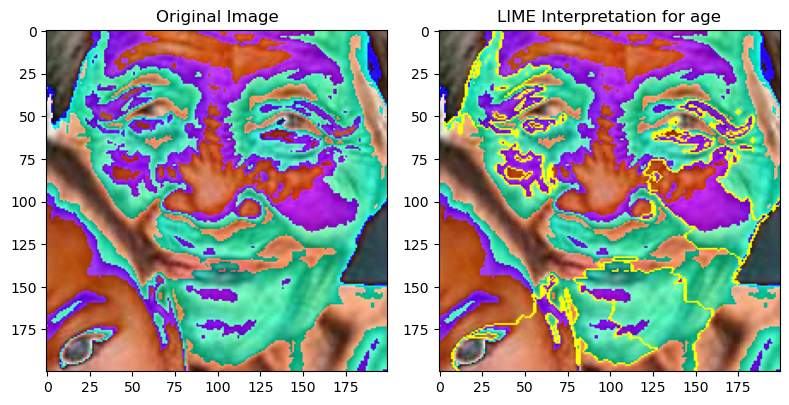

Interpreting model version v2 for worst performing sample 2 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

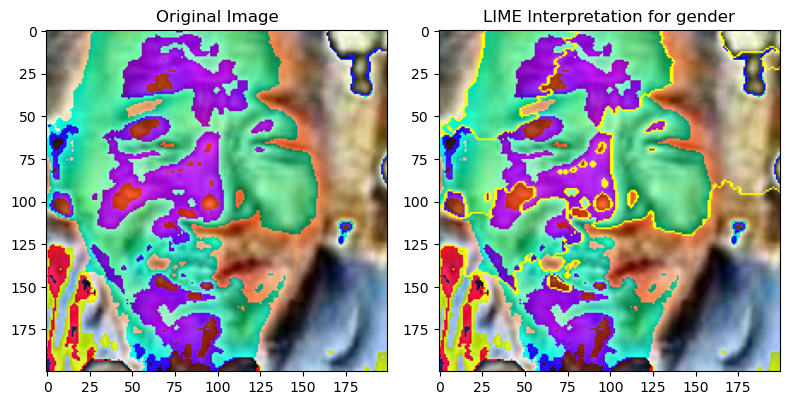

Interpreting model version v2 for worst performing sample 2 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

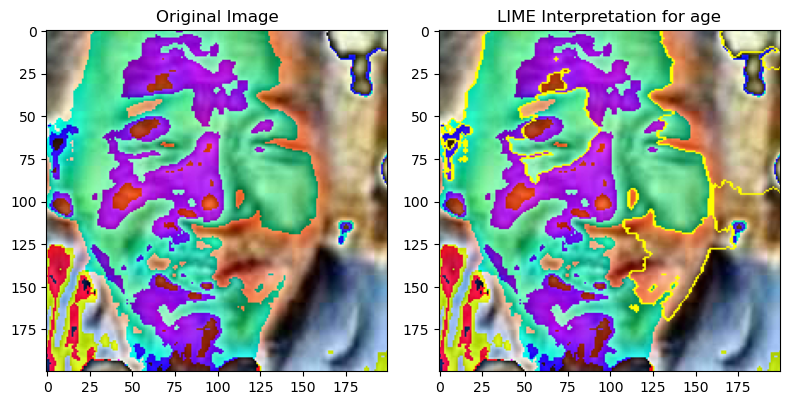

Interpreting model version v2 for worst performing sample 3 (gender prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

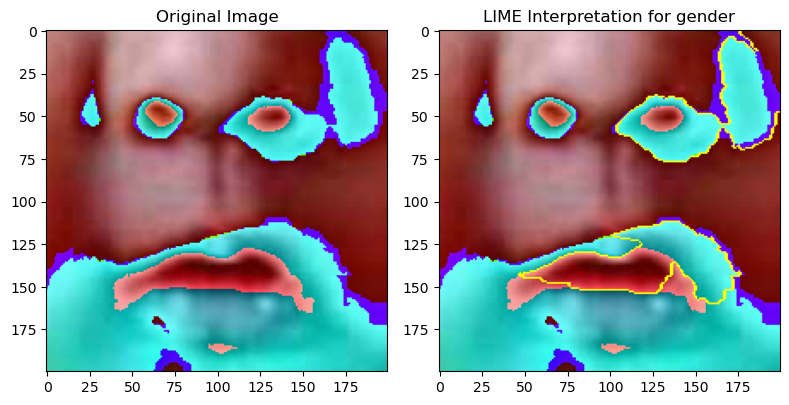

Interpreting model version v2 for worst performing sample 3 (age prediction).


  0%|          | 0/1000 [00:00<?, ?it/s]

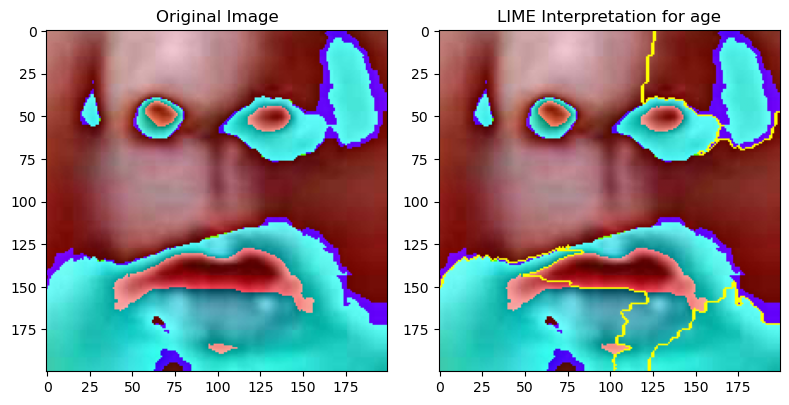

In [12]:
if os.path.exists(checkpoint_path):
    print(f"--- Evaluating Model Version: {VERSION} ---")
    
    try:
        model = load_model_from_checkpoint(MultiTaskResNet, checkpoint_path, learning_rate=LEARNING_RATE)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model from checkpoint: {e}")

    try:
        all_predictions, all_targets = evaluate_samples(model, test_loader)

        best_samples, worst_samples = get_best_and_worst_samples(all_predictions)

        model_wrapper = ModelWrapper(model)
        for i, (image, _, _) in enumerate(best_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255 
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for best performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

        for i, (image, _, _) in enumerate(worst_samples):
            image_np = image.permute(1, 2, 0).cpu().numpy() * 255 
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (gender prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='gender')
            print(f"Interpreting model version {VERSION} for worst performing sample {i + 1} (age prediction).")
            interpret_sample(model_wrapper, image_np.astype('uint8'), None, feature_name='age')

    except Exception as e:
        print(f"Error during model evaluation: {e}")

### Best Performing Samples
**Sample 1**
   - The best performing sample for both gender and age predictions seems to be an image with distinct facial features such as clear eyes, lips, and an unobstructed face.
   - LIME highlights significant parts of the face, particularly the eyes, nose, and mouth regions. These areas are generally rich in features that help in determining both gender and age.
   - The model's emphasis on these key facial regions for classification aligns with typical human perception, suggesting that the features extracted are informative and accurate for this sample.

**Sample 2**
   - Similar to sample 1, sample 2 also presents a well-lit face with distinct features and minimal obstructions, making it easier for the model to learn and accurately predict.
   - LIME emphasizes areas like eyes, mouth, and cheeks for both gender and age prediction. This indicates that the model is correctly focusing on regions that provide high discriminative power for distinguishing gender and estimating age.

**Sample 3**
   - The third best performing sample shows an image that also has a clear view of facial features. There is minimal noise or obstruction, and the face is well-lit, making key features distinguishable.
   - The LIME explanation reveals that the model is focusing on relevant parts of the face, including the contours and key facial structures.

### Worst Performing Samples
**Sample 1**
   - This worst performing sample has noticeable distortions in colors, which may imply artifacts due to preprocessing or noise. The LIME interpretation shows that the model may have struggled to focus on relevant areas, possibly due to these distortions.
   - The presence of inconsistent lighting and lack of distinguishable features might have contributed to the model's poor performance.

**Sample 2**
   - Sample 2 shows a face that is highly occluded, possibly due to a side angle or the presence of shadows. The LIME visualization indicates that the model is focusing on parts that might not be informative (e.g., occluded regions or areas with heavy shadow).
   - In such cases, the model may not have enough reliable information to make an accurate prediction, leading to errors.

**Sample 3**
   - The third worst performing sample seems to show an image with minimal visible facial features, such as a partially occluded or non-frontal face.
   - The LIME explanation suggests that the model may have incorrectly focused on irrelevant areas due to the lack of clear and informative facial cues. This leads to uncertainty in predictions for both gender and age.

### General Observations

> Reasons for Best/Worst Performance
1. Lighting and Image Quality
   - The best performing samples have good lighting, minimal noise, and sharp, clear features that allow the model to extract discriminative characteristics effectively. In contrast, the worst performing samples often suffer from poor lighting, noise, or significant occlusion, reducing the effectiveness of feature extraction.

2. Feature Richness
   - The best performing samples tend to have prominent and diverse facial features (such as well-defined eyes, nose, and mouth). These features are crucial for differentiating gender and estimating age accurately. The worst performing samples either lack such feature richness or present artifacts that confuse the model.

3. Occlusions and Facial Positioning
   - Images where the face is partially occluded or presented from a side angle are often challenging for models because key features may be missing or distorted. LIME visualizations show the model’s confusion, where irrelevant parts of the image are highlighted, suggesting a lack of confidence in the prediction.

4. Age Group Challenges
   - The age predictions seem to suffer more in images where distinguishing features are subtle, such as for older adults (due to skin wrinkles) or young children (less distinct facial features). The LIME explanations show a scatter of attention that suggests the model is struggling to identify unique indicators of age.

> Conclusion

Model v2 performs well when it has access to high-quality images with clear and distinct facial features. For best performing images, LIME highlights facial features that are consistent with human interpretation, while for worst performing images, the model seems to be confused by noise, distortions, or occlusions. 

## Performance Per Gender

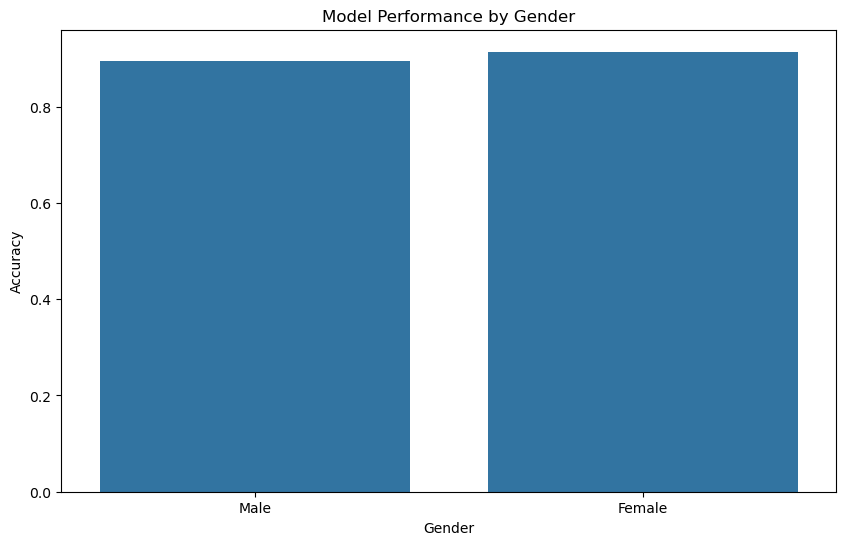

In [13]:
all_gender_targets = []
all_gender_preds = []

model.eval()
with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        gender_targets = targets['gender']
        
        images = images.to(device)
        gender_targets = gender_targets.to(device)
        
        _, gender_preds = model(images)
        gender_preds = torch.argmax(gender_preds, dim=1)

        all_gender_targets.extend(gender_targets.cpu().numpy())
        all_gender_preds.extend(gender_preds.cpu().numpy())

all_gender_targets = np.array(all_gender_targets)
all_gender_preds = np.array(all_gender_preds)

gender_labels = ['Male', 'Female']
gender_results = {label: {'Correct': 0, 'Total': 0} for label in gender_labels}

for actual, pred in zip(all_gender_targets, all_gender_preds):
    gender_results[gender_labels[actual]]['Total'] += 1
    if actual == pred:
        gender_results[gender_labels[actual]]['Correct'] += 1

gender_performance = [gender_results[gender]['Correct'] / gender_results[gender]['Total'] for gender in gender_labels]

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_labels, y=gender_performance)
plt.xlabel('Gender')
plt.ylabel('Accuracy')
plt.title('Model Performance by Gender')
plt.show()

## Performance Per Age Group

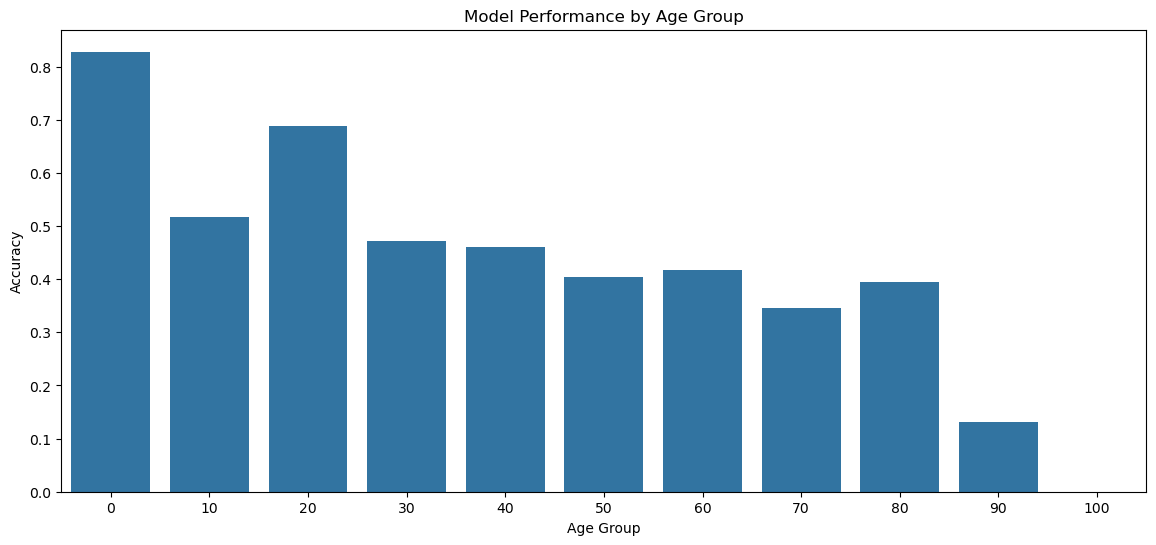

In [14]:
all_age_targets = []
all_age_preds = []

with torch.no_grad():
    for batch in test_loader:
        images, targets = batch
        age_targets = targets['age']

        images = images.to(device)
        age_targets = age_targets.to(device)

        age_preds, _ = model(images)

        all_age_targets.extend(age_targets.cpu().numpy())
        all_age_preds.extend(age_preds.cpu().numpy())

all_age_targets = np.array(all_age_targets)
all_age_preds = np.array(all_age_preds)

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
age_groups = pd.cut(all_age_targets, bins=age_bins)
age_accuracy = []

for age_bin in age_bins[:-1]:
    mask = (all_age_targets >= age_bin) & (all_age_targets < age_bin + 10)
    correct_predictions = np.sum((all_age_preds[mask] >= age_bin) & (all_age_preds[mask] < age_bin + 10))
    accuracy = correct_predictions / np.sum(mask) if np.sum(mask) > 0 else 0
    age_accuracy.append(accuracy)

plt.figure(figsize=(14, 6))
sns.barplot(x=age_bins[:-1], y=age_accuracy)
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.title('Model Performance by Age Group')
plt.show()

### Model Performance by Gender:
  - The model performs almost equally well for both male and female samples, with an accuracy close to 0.9 for both genders.
  - This indicates that the model does not show a significant bias in gender classification and is handling gender equally well for both categories.

### Model Performance by Age Group:
> High Performance for Younger Age Groups:
  - The highest accuracy is observed for the youngest age group (0-10 years), reaching over 0.8. This trend may be because of more distinct features in very young individuals (e.g., smoother skin, prominent facial structure) which the model may find easier to identify.
  - Ages between 20-30 also show relatively good performance, possibly due to a large number of representative samples and more distinctive features.

> Decreasing Accuracy with Increasing Age:
  - A noticeable drop in performance occurs for the age groups from 30 to 90, with a consistent decline. This could be due to the lack of distinctive visual cues as age increases and potentially fewer samples in these age groups.
  - The model struggles particularly for individuals in the age range of 90-100, which has the lowest accuracy among all groups. This could be due to the smaller representation of older individuals in the dataset and higher variance in facial features due to aging.

### Overall Observations for Model V2:
- Shows good performance in gender prediction, with balanced accuracy for male and female individuals, as indicated by the performance plot. This implies successful generalization across genders.
- The model struggles with older age groups due to either lack of sufficient training data for those categories or challenges in identifying age-specific features in older individuals. Additionally, aging introduces more variability in facial features, which could confuse the model.
- The best-performing samples had high image quality, clear features, and no occlusions. In contrast, the worst-performing samples were often characterized by blurriness, occlusion, or poor lighting, leading to misinterpretation of key features by the model.